In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('amazon.csv', encoding="iso-8859-1",parse_dates=['date'])
data.dtypes

year               int64
state             object
month             object
number           float64
date      datetime64[ns]
dtype: object

In [3]:
data.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


# Cleaning the given dataset

 ## columns name to upper case

In [4]:
data.columns = list(i.upper() for i in data.columns)
data.head()

,YEAR,STATE,MONTH,NUMBER,DATE
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


##  Renaming Month Column from Portuguese to English

In [5]:
# Current Names Of Months 
Old_Names=data['MONTH'].unique()

In [6]:
#Constructing a dictionary through two list using ZIP()
New_Names=['January','February','March','April','May','June','July','August','September','October','Novermber','December']
Dic = dict(zip(Old_Names,New_Names))
Dic

{'Janeiro': 'January',
 'Fevereiro': 'February',
 'Março': 'March',
 'Abril': 'April',
 'Maio': 'May',
 'Junho': 'June',
 'Julho': 'July',
 'Agosto': 'August',
 'Setembro': 'September',
 'Outubro': 'October',
 'Novembro': 'Novermber',
 'Dezembro': 'December'}

In [7]:
data.replace(Dic, inplace=True)

In [8]:
data.head()

,YEAR,STATE,MONTH,NUMBER,DATE
0,1998,Acre,January,0.0,1998-01-01
1,1999,Acre,January,0.0,1999-01-01
2,2000,Acre,January,0.0,2000-01-01
3,2001,Acre,January,0.0,2001-01-01
4,2002,Acre,January,0.0,2002-01-01


## Removing Duplicate Data From Dataset

In [9]:
# Checking for Duplicate Value
if(data.duplicated().any()):
    print("Yes Duplicate Present")
else:
    print("No, There are no Duplicate values")

Yes Duplicate Present


In [10]:
#Dropin All Duplicate values
data = data.drop_duplicates()

# Analysis Of Dataset through Question

## 1. Find Shape of our Dataset (Number  of Rows And Number of  Columns)

In [11]:
print("Number of Rows:" ,data.shape[0])
print("Number of Columns:",data.shape[1])

Number of Rows: 6422
Number of Columns: 5


## 2. Getting Information About Our Dataset (Total No. of Rows,  Datatypes of Each Columns And Memory Required)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6422 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   YEAR    6422 non-null   int64         
 1   STATE   6422 non-null   object        
 2   MONTH   6422 non-null   object        
 3   NUMBER  6422 non-null   float64       
 4   DATE    6422 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 250.9+ KB


## 3. Checking Null Values In Our Dataset

In [13]:
print(data.isnull().sum())

YEAR      0
STATE     0
MONTH     0
NUMBER    0
DATE      0
dtype: int64


## 4. Get Overall Statistic About Dataset

In [14]:
data.describe()

,YEAR,NUMBER
count,6422.000000,6422.000000
mean,2007.490969,108.815178
std,5.731806,191.142482
min,1998.000000,0.000000
25%,2003.000000,3.000000
50%,2007.000000,24.497000
75%,2012.000000,114.000000
max,2017.000000,998.000000


## 5. In Which Month Maximum Number of Fire Were Reported ?

In [15]:
MonthWise_Total = data.groupby('MONTH')['NUMBER'].sum().reset_index()
MonthWise_Total.head()

,MONTH,NUMBER
0,April,28184.770
1,August,88050.435
2,December,57535.480
3,February,30839.050
4,January,47681.844


In [16]:
#Custome Sorting on MonthWise_Total
Num=list(np.arange(12))
cust_ord = dict(zip(New_Names,Num))
cust_ord
MonthWise_Total = MonthWise_Total.sort_values(by=['MONTH'],key=lambda x: x.map(cust_ord))
MonthWise_Total.head()

,MONTH,NUMBER
4,January,47681.844
3,February,30839.050
7,March,30709.405
0,April,28184.770
8,May,34725.363


<AxesSubplot:xlabel='MONTH', ylabel='NUMBER'>

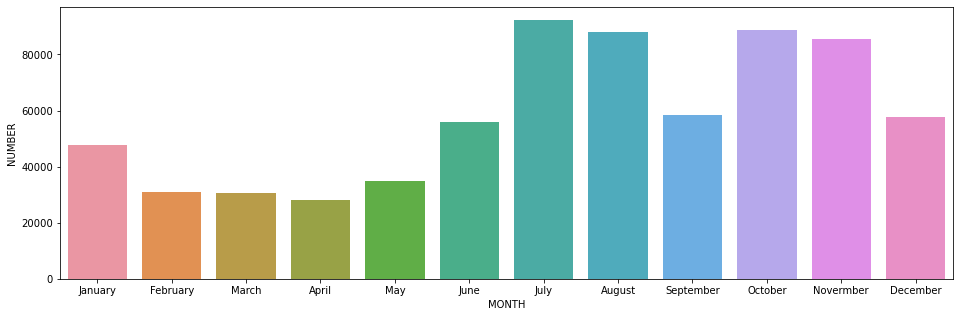

In [17]:
plt.figure(figsize=(16,5))
sns.barplot(x=MonthWise_Total['MONTH'], y=MonthWise_Total['NUMBER'])

## 6. In Which Year Maximum Number of Forest Fire were Reported?

In [80]:
YearWiseFire = data.groupby('YEAR')['NUMBER'].sum().reset_index()
YearWiseFire.head(4)

,YEAR,NUMBER
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29054.612


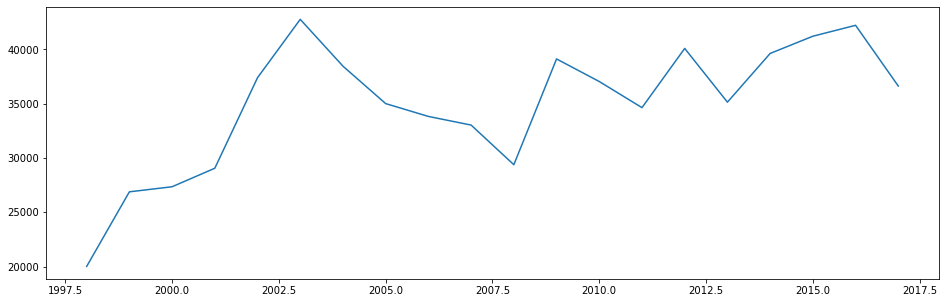

In [19]:
plt.figure(figsize=(16,5))
plt.plot(YearWiseFire['YEAR'],YearWiseFire['NUMBER'])
plt.show()

<AxesSubplot:xlabel='YEAR', ylabel='NUMBER'>

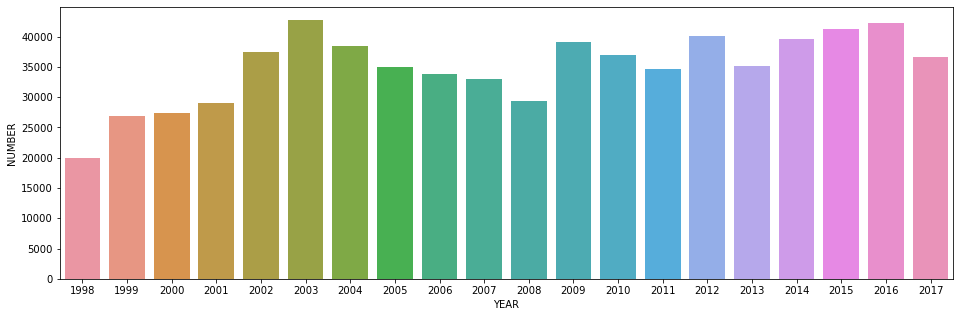

In [20]:
plt.figure(figsize=(16,5))
sns.barplot(x=YearWiseFire['YEAR'], y=YearWiseFire['NUMBER'])

 ## 7. In Which State Maximun Number of Forest Fire Were Reported?

In [21]:
StateWiseFire = data.groupby('STATE')['NUMBER'].sum().reset_index()
StateWiseFire

,STATE,NUMBER
0,Acre,18464.030
1,Alagoas,4606.000
2,Amapa,21831.576
3,Amazonas,30650.129
4,Bahia,44746.226
5,Ceara,30428.063
6,Distrito Federal,3561.000
7,Espirito Santo,6546.000
8,Goias,37695.520
9,Maranhao,25129.131


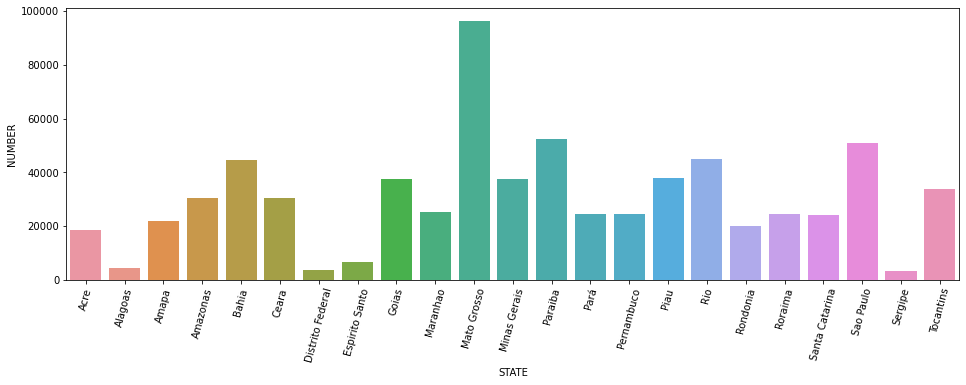

In [22]:
plt.figure(figsize=(16,5))
sns.barplot(x=StateWiseFire['STATE'], y=StateWiseFire['NUMBER'])
plt.xticks(rotation=75)
plt.show()

## 8. Find Total Number Of Fires Were Reported in Amazonas?

In [23]:
data.columns

Index(['YEAR', 'STATE', 'MONTH', 'NUMBER', 'DATE'], dtype='object')

In [24]:
data[data['STATE']=='Amazonas']['NUMBER'].sum()

30650.129

## 9. Display Number of Fire Were Reported In Amazonas (YearWise)

In [25]:
AmazonasRecord = data[data['STATE']=="Amazonas"]
AmazonasYearWise = AmazonasRecord.groupby('YEAR')["NUMBER"].sum().reset_index()
AmazonasYearWise

,YEAR,NUMBER
0,1998,946.000
1,1999,1061.000
2,2000,853.000
3,2001,1297.000
4,2002,2852.000
5,2003,1524.268
6,2004,2298.207
7,2005,1657.128
8,2006,997.640
9,2007,589.601


<AxesSubplot:xlabel='YEAR', ylabel='NUMBER'>

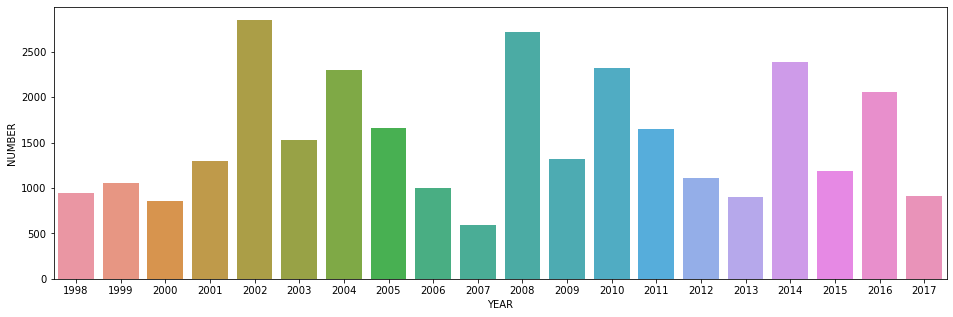

In [26]:
plt.figure(figsize=(16,5))
sns.barplot(x=AmazonasYearWise['YEAR'],y=AmazonasYearWise['NUMBER'])

## 10. Display Number Of Fire Were Reported In Rondonia (Day-Wise) ?

In [35]:
RondoniaData = data[data['STATE']=='Rondonia']
RondoniaData.head(20)

,YEAR,STATE,MONTH,NUMBER,DATE
5020,1998,Rondonia,January,0.0,1998-01-01
5021,1999,Rondonia,January,1.0,1999-01-01
5022,2000,Rondonia,January,0.0,2000-01-01
5023,2001,Rondonia,January,0.0,2001-01-01
5024,2002,Rondonia,January,6.0,2002-01-01
5025,2003,Rondonia,January,62.0,2003-01-01
5026,2004,Rondonia,January,30.0,2004-01-01
5027,2005,Rondonia,January,99.0,2005-01-01
5028,2006,Rondonia,January,16.0,2006-01-01
5029,2007,Rondonia,January,33.0,2007-01-01


In [49]:
DayWiseData = RondoniaData.groupby(RondoniaData['DATE'].dt.dayofweek).sum().NUMBER
import calendar
DayWiseData.index = [calendar.day_name[x] for x in range(0,7)]
DayWiseData = DayWiseData.reset_index()
DayWiseData

,index,NUMBER
0,Monday,1399.700
1,Tuesday,3597.321
2,Wednesday,2174.813
3,Thursday,3555.081
4,Friday,3511.237
5,Saturday,4146.781
6,Sunday,1900.496


,index,NUMBER
0,Monday,1399.700
1,Tuesday,3597.321
2,Wednesday,2174.813
3,Thursday,3555.081
4,Friday,3511.237
5,Saturday,4146.781
6,Sunday,1900.496


<AxesSubplot:xlabel='index', ylabel='NUMBER'>

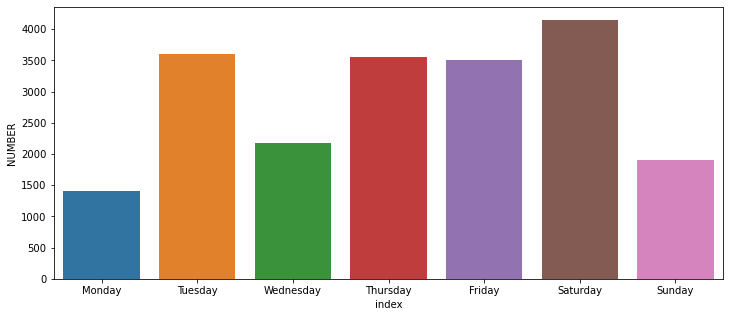

In [51]:
plt.figure(figsize=(12,5))
sns.barplot(x=DayWiseData['index'],y=DayWiseData['NUMBER'])

## 11. Find Total Number of Forest Fires Were Reported in 2015 and Visulalize Data Based on Each Month

In [54]:
Data2015 = data[data['YEAR']==2015]
Data2015.head(3)

,YEAR,STATE,MONTH,NUMBER,DATE
17,2015,Acre,January,1.0,2015-01-01
37,2015,Acre,February,2.0,2015-01-01
57,2015,Acre,March,2.0,2015-01-01


In [57]:
MonthWise2015 = Data2015.groupby('MONTH')['NUMBER'].sum().reset_index()
MonthWise2015

,MONTH,NUMBER
0,April,2573.000
1,August,4363.125
2,December,4088.522
3,February,2309.000
4,January,4635.000
5,July,4364.392
6,June,3260.552
7,March,2202.000
8,May,2384.000
9,Novermber,4034.518


<AxesSubplot:xlabel='MONTH', ylabel='NUMBER'>

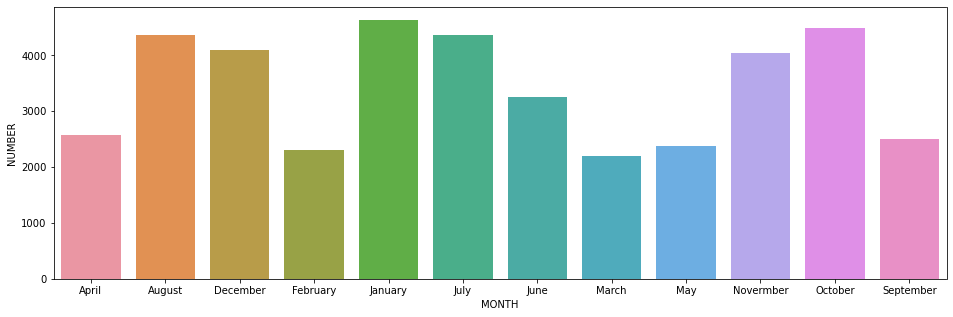

In [61]:
plt.figure(figsize=(16,5))
sns.barplot(x=MonthWise2015['MONTH'],y=MonthWise2015['NUMBER'])

## 12. Find Average Number of Fire that Were Reported From Highest to Lowest (state-wise)

In [73]:
StateWiseAverage = data.groupby('STATE')['NUMBER'].mean().reset_index()
StateWiseAverage.sort_values(by=['NUMBER'], ascending=False,inplace=True)
StateWiseAverage

,STATE,NUMBER
20,Sao Paulo,213.896226
10,Mato Grosso,203.479975
4,Bahia,187.222703
15,Piau,158.174674
8,Goias,157.721841
11,Minas Gerais,156.800243
22,Tocantins,141.037176
3,Amazonas,128.243218
5,Ceara,127.314071
12,Paraiba,111.073979


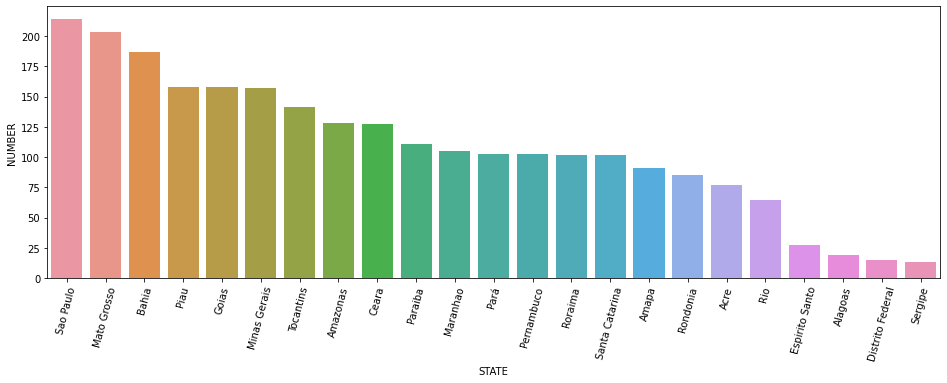

In [76]:
plt.figure(figsize=(16,5))
sns.barplot(x=StateWiseAverage['STATE'],y=StateWiseAverage['NUMBER'])
plt.xticks(rotation=75)
plt.show()

## 18. To find The State Name Where Fires Were Reported in 'december' Month

In [79]:
data[data['MONTH']=='December']['STATE'].unique()


array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)